In [3]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [4]:
folder="${fastMCKalmanOptTesting}/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
foldercheck=folder+"Covariance/"

folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.list"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
inputData = folder
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	$fastMCKalman/data/testTPC/fastParticle.root
Number of entries	1
0	0	$fastMCKalman/data/testTPC/fastParticle.root
Number of entries	1
0	0	$fastMCKalman/data/testTPC/fastParticle.root
Number of entries	1
0	0	$fastMCKalman/data/testTPC/fastParticle.root


Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class fastParticle read from file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.root
   has the same version (=1) as the active class but a different checksum.
   You should update the version to ClassDef(fastParticle,2).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the on-file layout version 1 of class 'fastParticle' differs from 
the in-memory layout version 1:
   int fAddMSsmearing; //
vs
   bool fAddMSsmearing; //


In [5]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

#treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pSeed","abs((1/cos(atan(seed.AliExternalTrackParam.fP[3])))/seed.AliExternalTrackParam.fP[4])")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")

treeSeed.SetAlias("Unit0MC","(p0Seed-p0MC)/c00Seed")
treeSeed.SetAlias("Unit1MC","(p1Seed-p1MC)/c11Seed")
treeSeed.SetAlias("Unit2MC","(p2Seed-p2MC)/c22Seed")
treeSeed.SetAlias("Unit3MC","(p3Seed-p3MC)/c33Seed")
treeSeed.SetAlias("Unit4MC","(p4Seed-p4MC)/c44Seed")




True

 FCN=1.34073e-12 FROM HESSE     STATUS=NOT POSDEF     16 CALLS          75 TOTAL
                     EDM=2.67822e-12    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.46470e+03   9.15260e+02   5.65022e-03   3.62127e-08
   2  Mean        -2.15496e-04   6.48099e-04   6.24555e-08  -1.53868e-03
   3  Sigma        4.44289e-02   1.12218e-02   5.51905e-07   3.68846e-04
 FCN=1.63454e-12 FROM HESSE     STATUS=NOT POSDEF     16 CALLS         115 TOTAL
                     EDM=3.26589e-12    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.88420e+03   1.52354e+03   9.97647e-03  -2.50250e-08
   2  Mean         1.46753e-01   3.67206e-02   2.40583e-07   1.03795e-03
   3  Sigma        1.4245

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.listUnit_p0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.listUnit_p1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.listUnit_p2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.listUnit_p3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPC/fastParticle.listUnit_p4.png has been created


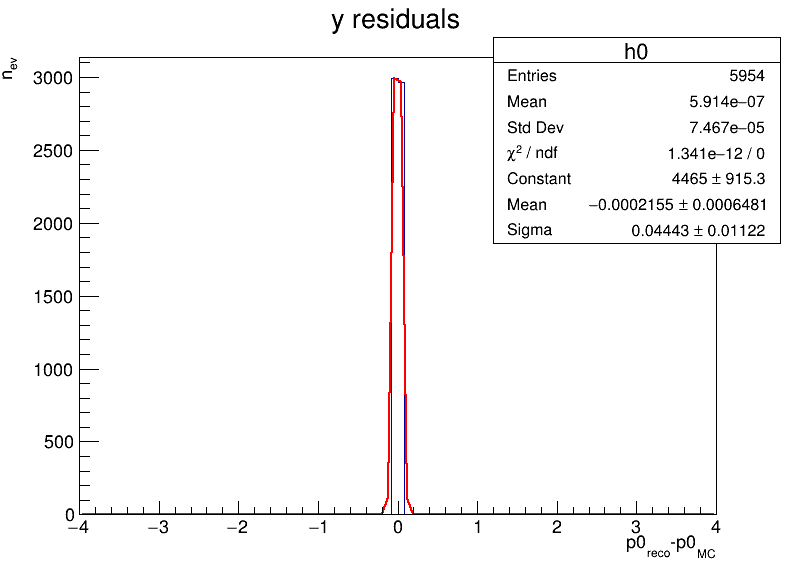

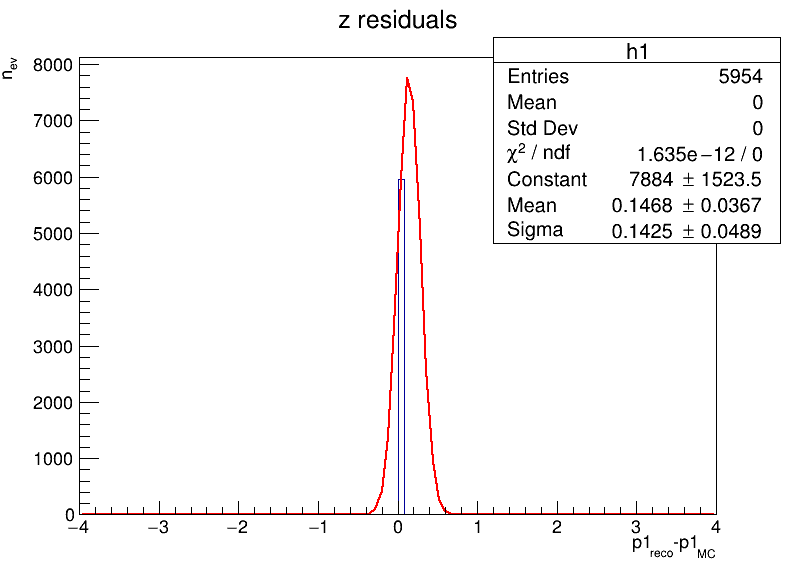

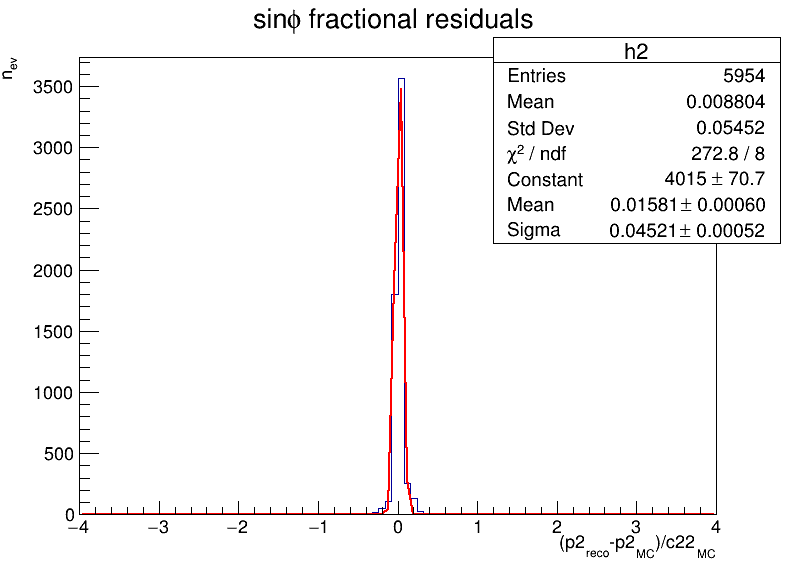

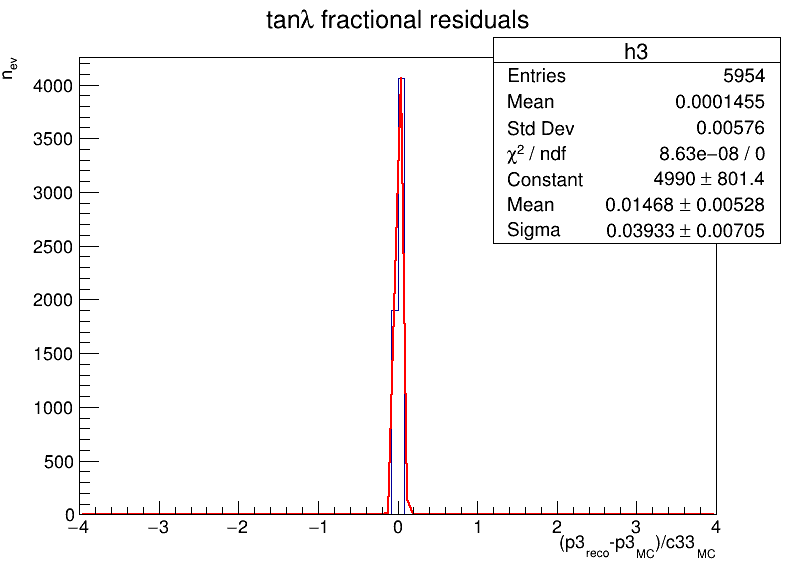

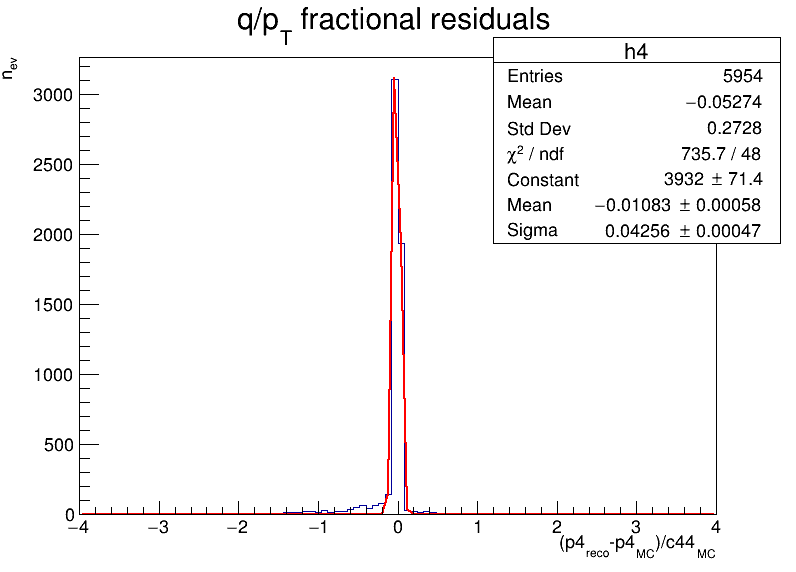

In [6]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
treeSeed.Draw("Unit0MC>>h0(100,-4,4)")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"Unit_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("Unit1MC>>h1(100,-4,4)")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"Unit_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"Unit_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Unit3MC>>h3(100,-4,4)")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"Unit_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Unit4MC>>h4(100,-4,4)")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"Unit_p4"+".png"
ch4.Print(save)